# Prep

/var/folders/n2/bpxkh5j55nx3ym9bf5t445jw0000gn/T/ipykernel_23536/3513068531.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq, audio_data = wavfile.read(audio_path)


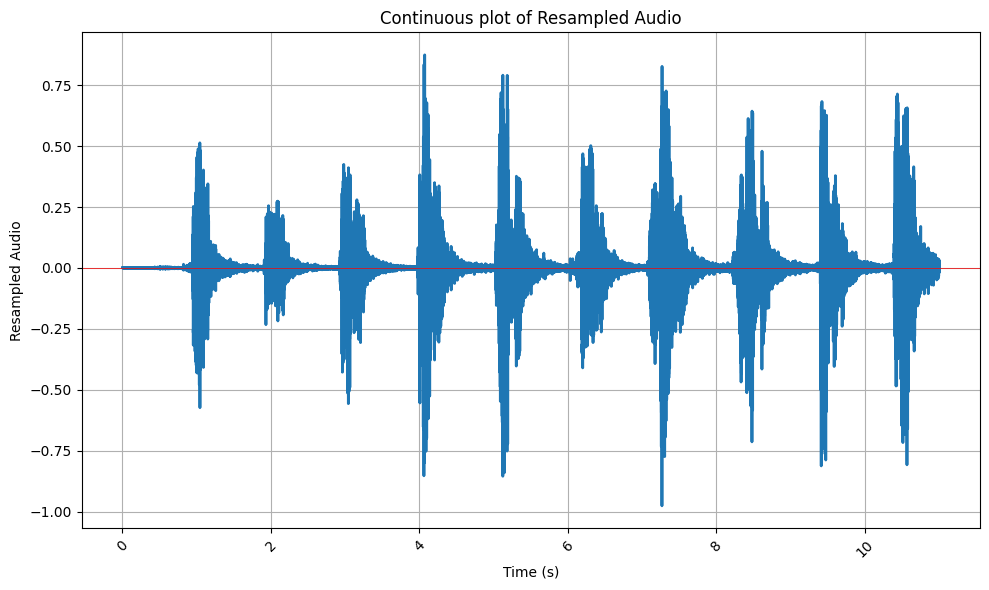

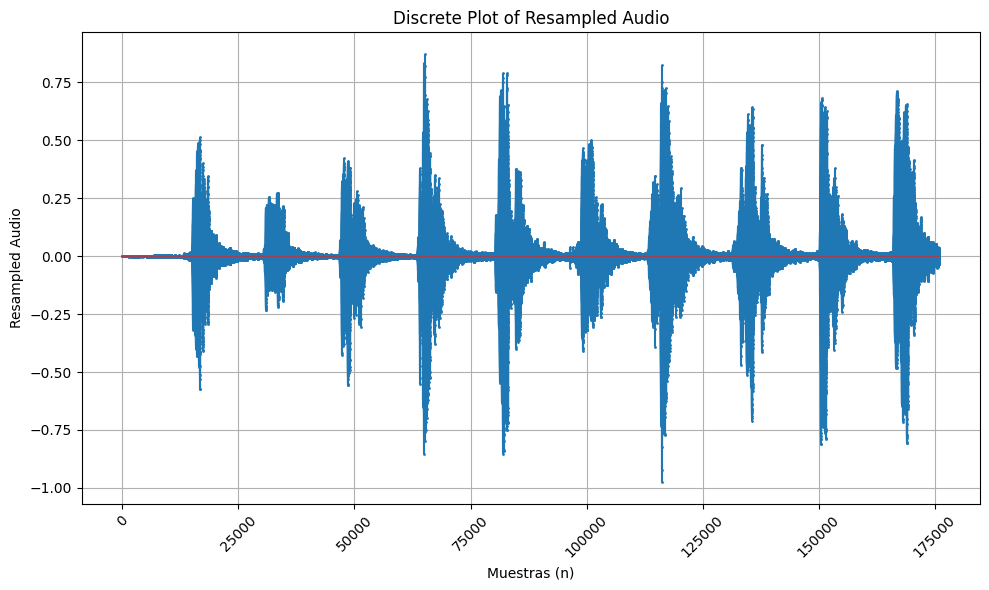

In [1]:
import sys
import numpy as np
import sounddevice as sd

sys.path.append("/Users/carlosedm10/projects/college/TDS")

from utils import continuous_time_plot, discrete_time_plot
from scipy.io import wavfile
from scipy.signal import resample


# Path to audio
audio_path = "/Users/carlosedm10/projects/college/TDS/P2/0-9 Carlos.wav"


# Read the audio file
freq, audio_data = wavfile.read(audio_path)

# Now we will make the audio Mono
if audio_data.ndim > 1:
    audio_data = audio_data.mean(axis=1)

# audio_data = audio_data / 2**15

# Normalization (if your audio data is in integers and needs to be normalized)
audio_data = audio_data / np.max(np.abs(audio_data))


# Changing the audio frequency to 16kHz

# Target frequency
target_freq = 16000

# Calculate new length of the sample
new_length = int(len(audio_data) * target_freq / freq)

# Resample the audio to the target frequency
audio_data_resampled = resample(audio_data, new_length)

# Time vector
t = np.arange(0, len(audio_data_resampled) / target_freq, 1 / target_freq)

# Plot the audio
continuous_time_plot(t, audio_data_resampled, variable_name="Resampled Audio")
discrete_time_plot(audio_data_resampled, variable_name="Resampled Audio")

# Exercise 1
Calculating the energy of the audio in 20ms windows

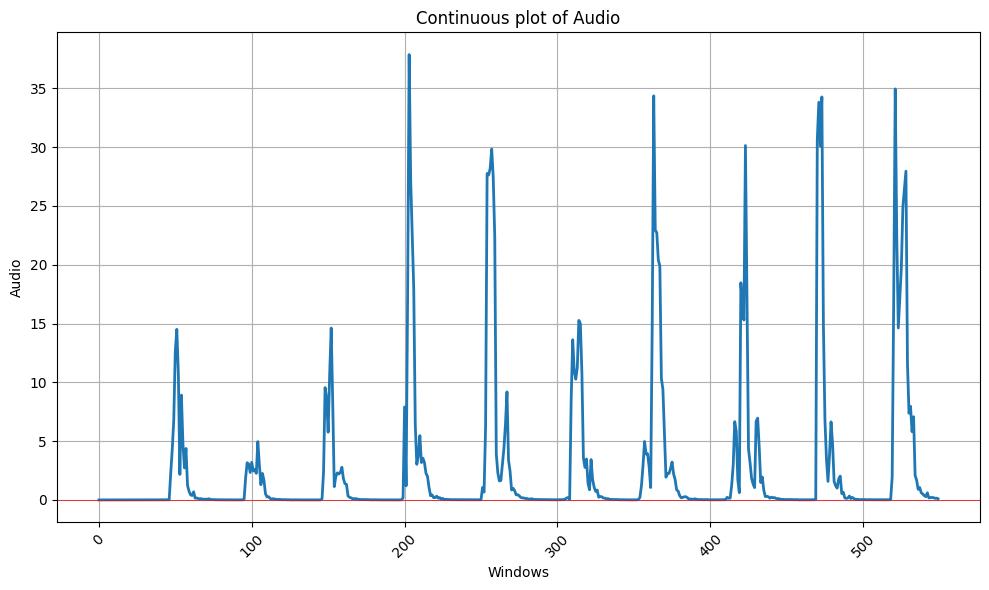

In [2]:
window_size = 0.02  # 20ms
window_samples = int(window_size * target_freq)

# Number of windows
n_windows = int(len(audio_data_resampled) / window_samples)

# Energy
energy_frames = []

for window in range(n_windows):
    energy_frames.append(
        np.sum(
            audio_data_resampled[
                window * window_samples : (window + 1) * window_samples
            ]
            ** 2
        )
    )


continuous_time_plot(energy_frames, variable_name="Audio", xlabel="Windows")

# Exercise 2

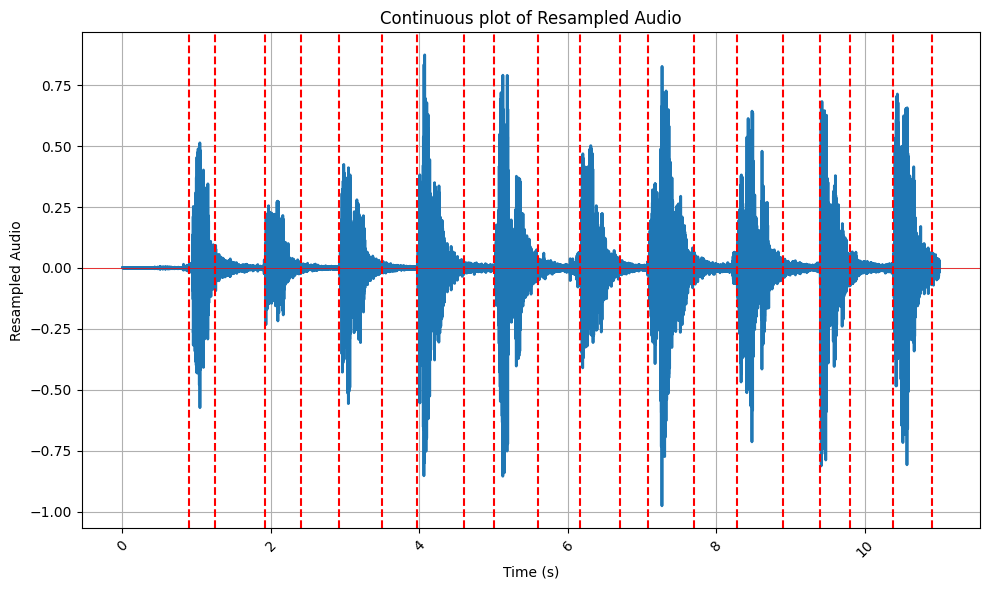

In [3]:
# %matplotlib widget
# Plotting the energy in seconds
from matplotlib import pyplot as plt


t = np.arange(
    0,
    len(energy_frames) / (target_freq / window_samples),
    1 / (target_freq / window_samples),
)
# continuous_time_plot(t, energy_frames, variable_name="Audio", xlabel="Time (s)")

# Creating a time vetor for the start and end of each number

numbers_seconds = {
    "0": [0.9, 1.25],
    "1": [1.92, 2.4],
    "2": [2.92, 3.5],
    "3": [3.97, 4.6],
    "4": [5, 5.6],
    "5": [6.16, 6.7],
    "6": [7.08, 7.7],
    "7": [8.28, 8.9],
    "8": [9.4, 9.8],
    "9": [10.38, 10.9],
}
# Transforming the dictionary into a vector

vertical_lines = []
for number in numbers_seconds:
    vertical_lines.append(numbers_seconds[number][0])
    vertical_lines.append(numbers_seconds[number][1])


# Plotting the resampled audio with vertical lines for the start and end of each number


# Time vector
t = np.arange(0, len(audio_data_resampled) / target_freq, 1 / target_freq)

# Plot the audio
continuous_time_plot(
    t,
    audio_data_resampled,
    variable_name="Resampled Audio",
    vertical_lines=vertical_lines,
)

# Exercise 3

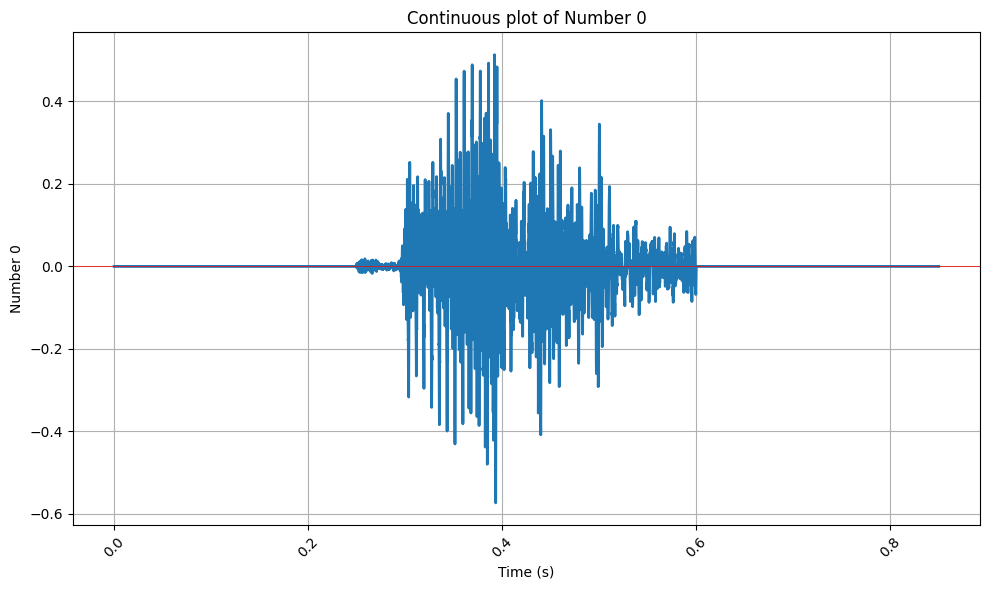

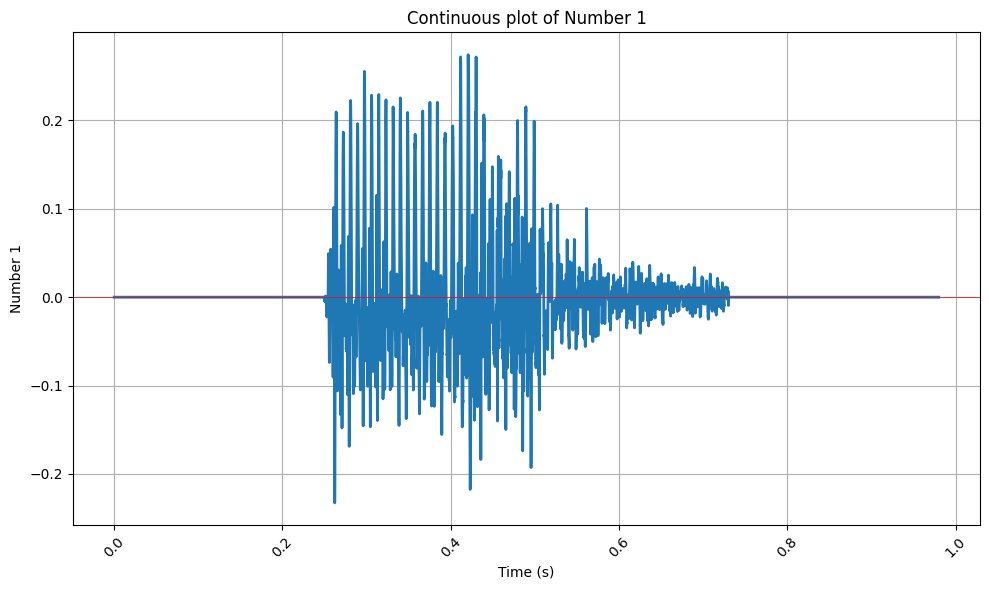

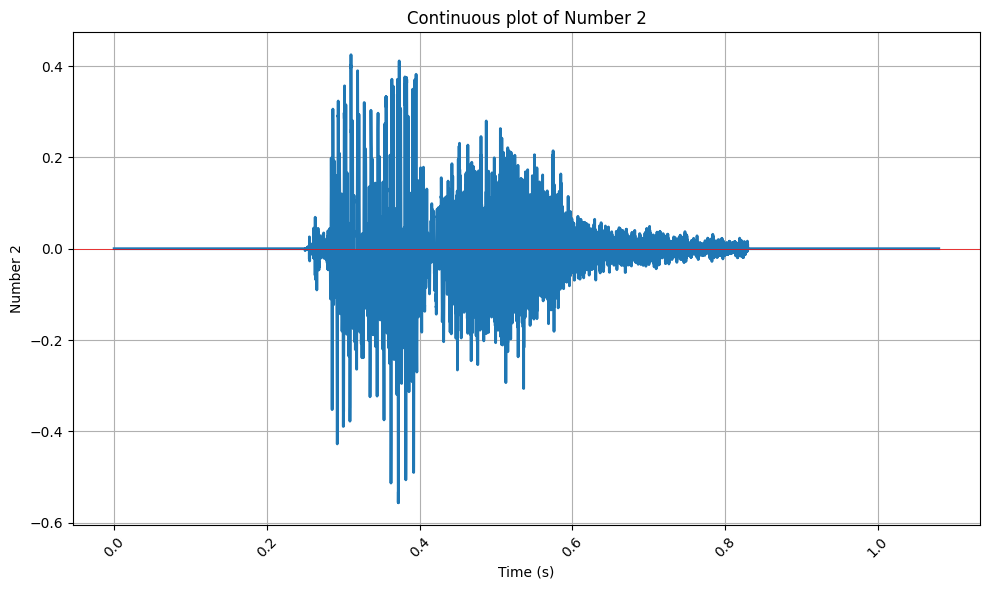

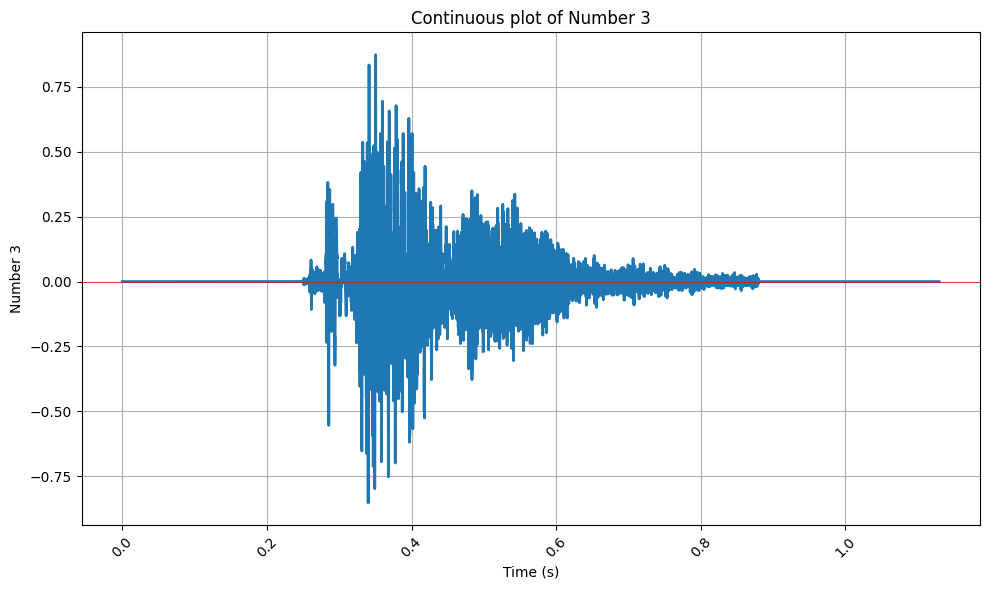

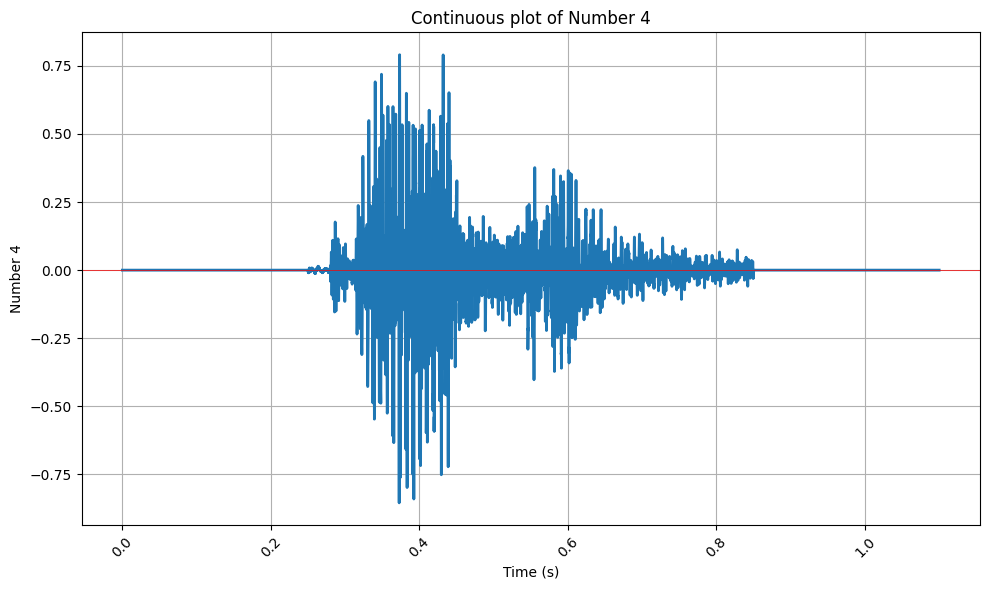

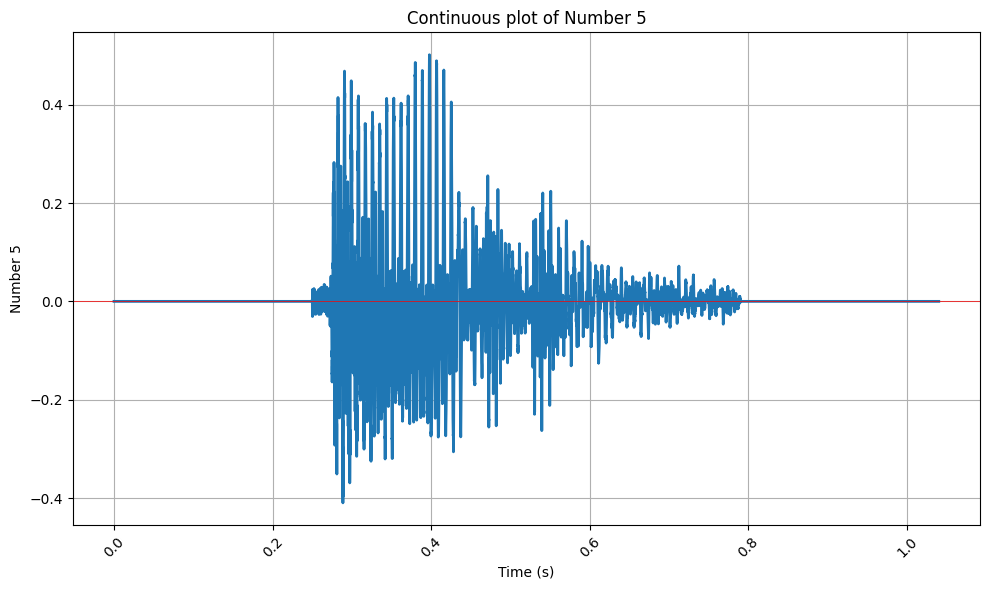

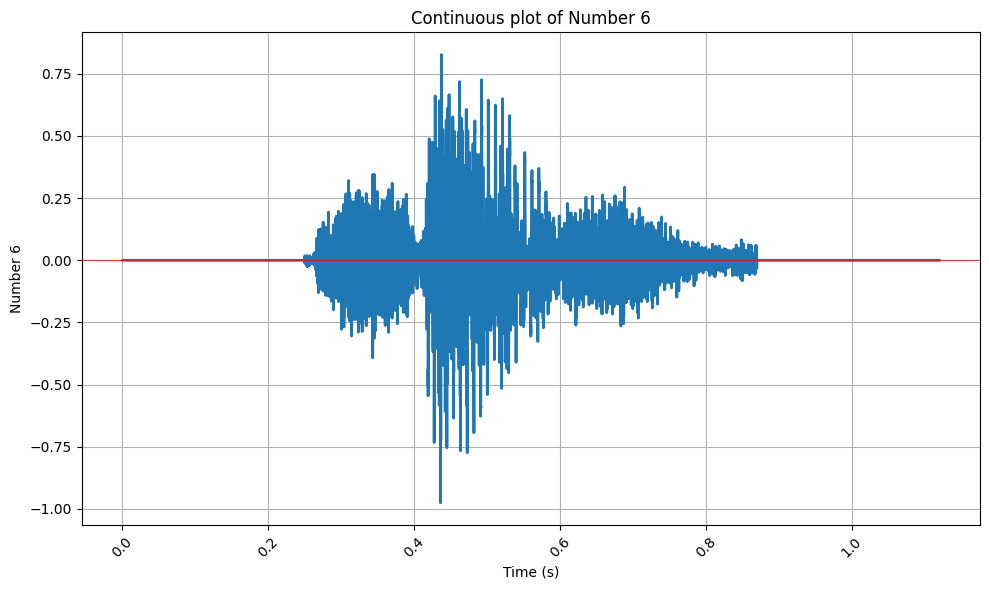

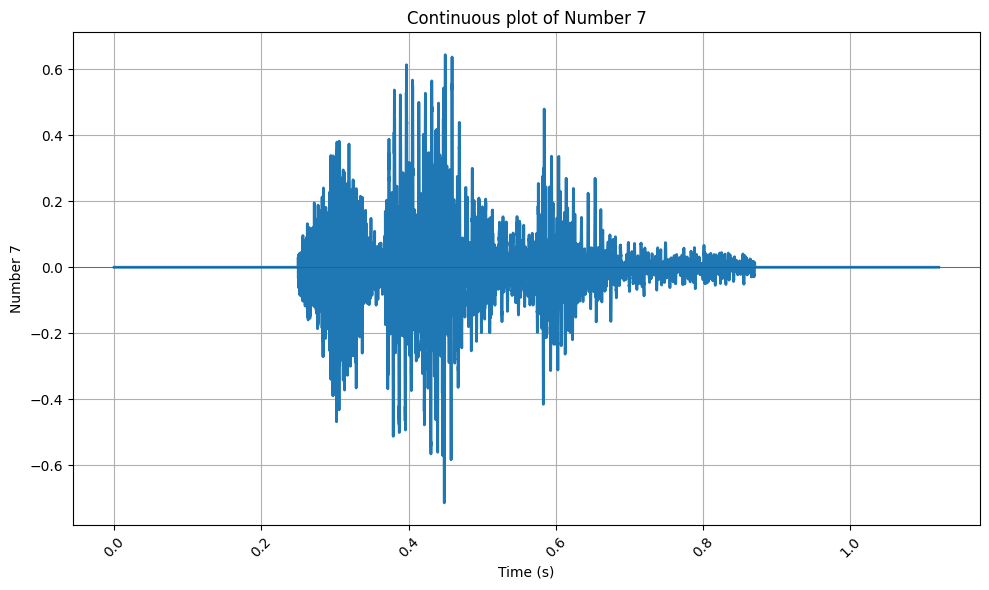

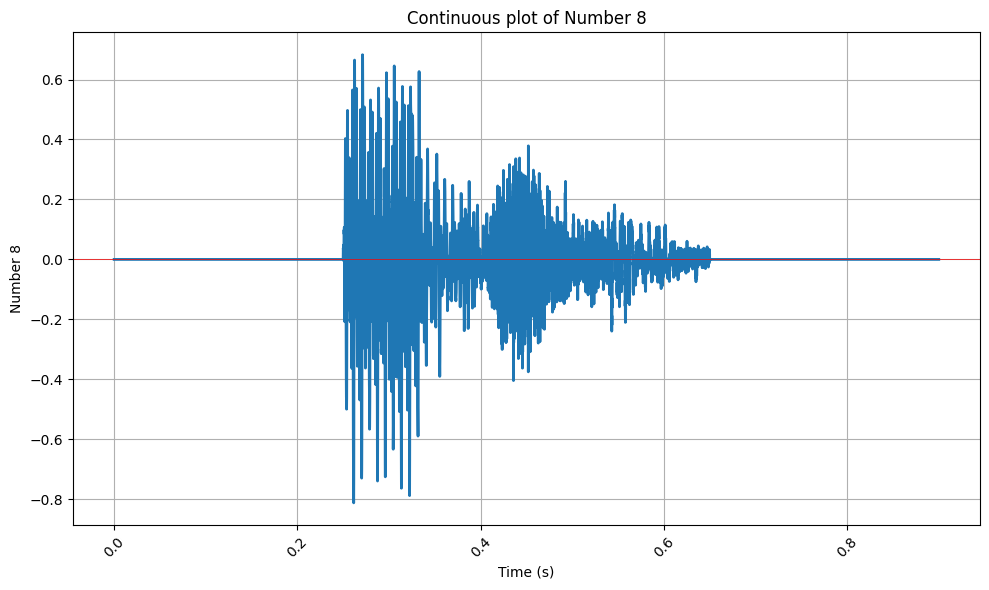

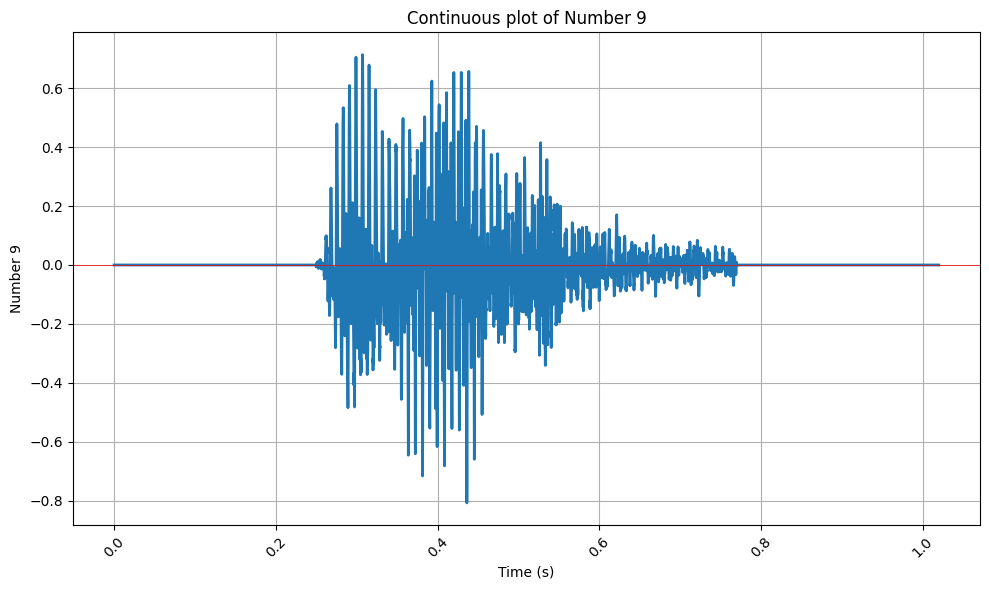

In [4]:
# Now we are going to trim each number using the times we found before and then add 0.25s of silence to the start and end of each number
# then we will save each in a different variable with the name of the number to save them as .wav files

# Adding 0.25s of silence to the start and end of each number
silence = np.zeros(int(0.25 * target_freq))

# Saving each number as a .wav file
for number in numbers_seconds:
    start = int(numbers_seconds[number][0] * target_freq)
    end = int(numbers_seconds[number][1] * target_freq)

    # Adding 0.25s of silence to the start and end of each number
    number_data = np.concatenate((silence, audio_data_resampled[start:end], silence))

    # Plotting the number
    t = np.arange(0, len(number_data) / target_freq, 1 / target_freq)
    continuous_time_plot(t, number_data, variable_name=f"Number {number}")

    # Saving the number as a .wav file
    wavfile.write(f"carlos_{number}_v1.wav", target_freq, number_data)

    # # Playing the number
    # sd.play(number_data, target_freq)
    # sd.wait()

# Exercise 4

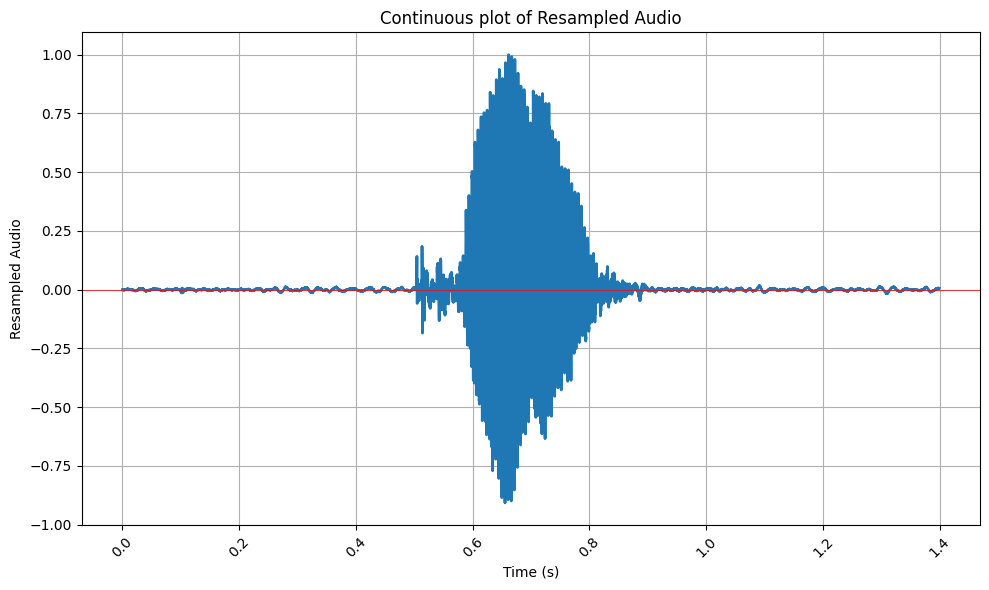

/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


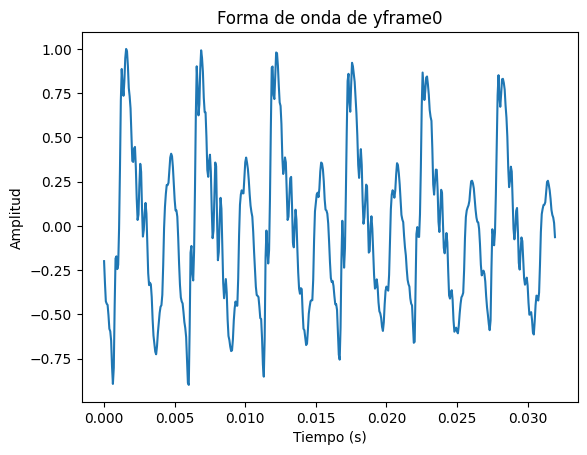

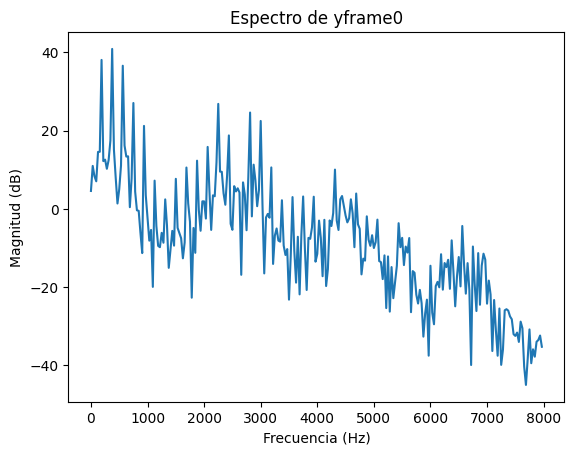

Picos para yframe0: [187.5 375.  562.5 750.  937.5] Hz
The average difference between the peaks is: 187.5 Hz
With a standard deviation of: 0.0 Hz


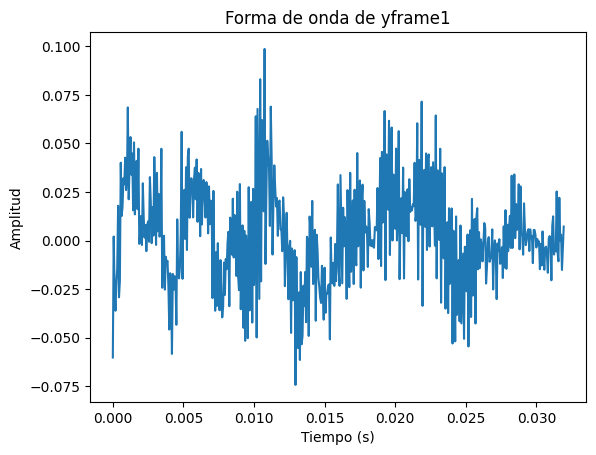

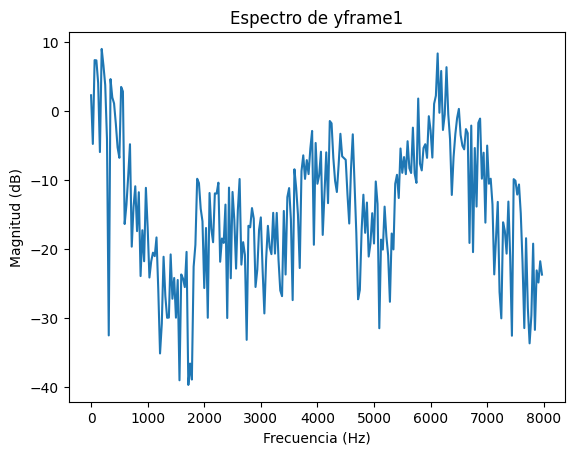

Picos para yframe1: [] Hz
The average difference between the peaks is: nan Hz
With a standard deviation of: nan Hz


/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [5]:
# Now we are going to plot the spectrogram of the audio
from scipy.signal import spectrogram

tres_path = "/Users/carlosedm10/projects/college/TDS/P2/tres3.wav"
freq, tres_data = wavfile.read(tres_path)
# Now we will make the audio Mono
if tres_data.ndim > 1:
    tres_data = tres_data.mean(axis=1)

# Normalization
tres_data = tres_data / np.max(np.abs(tres_data))
t = np.arange(0, len(tres_data) / freq, 1 / freq)

# Ploting the audio
continuous_time_plot(t, tres_data, variable_name="Resampled Audio")

# Setting windows of 32ms
window_size = 0.032  # 32ms
window_samples = int(window_size * freq)

# Number of windows
n_windows = int(len(tres_data) / window_samples)

yframe1 = tres_data[int(0.66 * freq) : int(0.66 * freq) + window_samples]
yframe2 = tres_data[int(0.82 * freq) : int(0.82 * freq) + window_samples]

frames = [yframe1, yframe2]

for i, yframe in enumerate(frames):
    Yframe = np.fft.fft(yframe)
    ejef = np.fft.fftfreq(window_samples, 1 / freq)

    # Time Plot
    plt.figure()
    plt.plot(np.arange(window_samples) / freq, yframe)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title(f"Forma de onda de yframe{i}")

    # Frequency Plot
    plt.figure()
    plt.plot(
        ejef[: window_samples // 2],
        20 * np.log10(Yframe[: window_samples // 2]),
    )
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.title(f"Espectro de yframe{i}")
    plt.show()

    # 6 firsts Peaks of the spectrum
    picos = np.where((ejef > 0) & (ejef < 4000) & (20 * np.log10(Yframe) > 20))[
        0
    ]  # Picos de 20dB o más
    print(f"Picos para yframe{i}: {ejef[picos][:5]} Hz")
    print(
        f"The average difference between the peaks is: {np.mean(np.diff(ejef[picos][:5]))} Hz"
    )
    print(f"With a standard deviation of: {np.std(np.diff(ejef[picos][:5]))} Hz")

# Exercise 5

/Users/carlosedm10/projects/college/venv/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 0, using nperseg = 0
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: not enough values to unpack (expected 2, got 1)

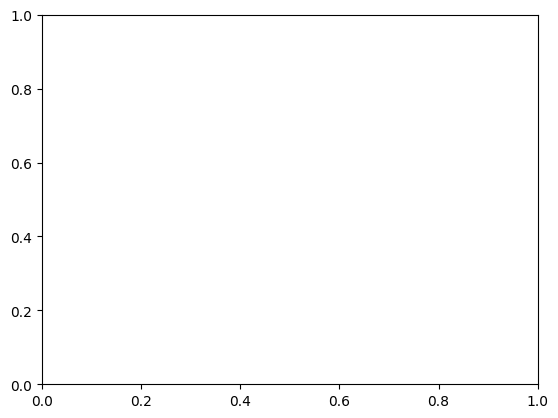

In [6]:
# Deleting the first 0.5s of silence and the last 0.5s of silence
sec2delete = int(0.5 * freq)
end = len(tres_data) - sec2delete

tres_data_cropped = tres_data[start:end]

window_size = 0.032  # 32ms
window_samples = int(window_size * freq)

# Segmenting the audio into 3 32ms windows
yframe1 = tres_data_cropped[:window_samples]

# Plotting a spectrogram of the first 3 windows
f, t, Sxx = spectrogram(yframe1, freq)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.title("Spectrogram")
plt.show()